<a href="https://colab.research.google.com/github/Novice1414/Final_Year_Project/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes_DataSet.csv')

In [3]:
diabetes_df = diabetes_df.rename(columns={'Diabetes Outcome': 'DO'})

In [111]:
x=diabetes_df.drop(['DO'], axis=1)
y=diabetes_df['DO']

In [112]:
y.value_counts()

DO
0    500
1    268
Name: count, dtype: int64

<Axes: ylabel='count'>

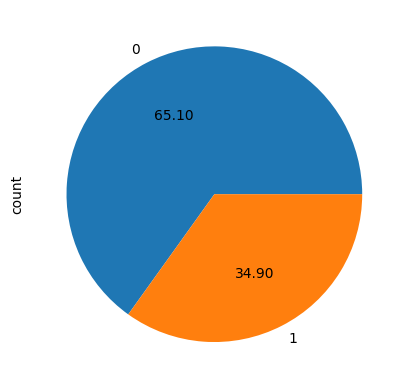

In [113]:
y.value_counts().plot.pie(autopct = '%.2f')

In [4]:
diabetes_df.shape

(768, 14)

In [5]:
diabetes_df.head(20)

,Pregnancies,Age,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),DO
0,6,50,148,72,35,0,33.6,0.627,No,No,Yes,1,1,1
1,1,31,85,66,29,0,26.6,0.351,No,Yes,No,1,0,0
2,8,32,183,64,0,0,23.3,0.672,Yes,No,No,0,1,1
3,1,21,89,66,23,94,28.1,0.167,Yes,No,No,0,0,0
4,0,33,137,40,35,168,43.1,2.288,Yes,Yes,Yes,0,1,1
5,5,30,116,74,0,0,25.6,0.201,Yes,Yes,Yes,1,1,0
6,3,26,78,50,32,88,31.0,0.248,Yes,No,No,1,0,1
7,10,29,115,0,0,0,35.3,0.134,No,Yes,No,1,1,0
8,2,53,197,70,45,543,30.5,0.158,Yes,No,Yes,1,1,1
9,8,54,125,96,0,0,0.0,0.232,Yes,Yes,No,0,0,1


In [6]:
diabetes_df.isnull().sum()

Pregnancies                 0
Age                         0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Polyphagia                  0
Visual Blurring             0
Obesity                     0
Smoker                      0
High Cholestrol (HDL)       0
DO                          0
dtype: int64

In [8]:
diabetes_df['Polyphagia'] = diabetes_df['Polyphagia'].replace({'Yes': 1, 'No': 0})
diabetes_df['Visual Blurring'] = diabetes_df['Visual Blurring'].replace({'Yes': 1, 'No': 0})
diabetes_df['Obesity'] = diabetes_df['Obesity'].replace({'Yes': 1, 'No': 0})

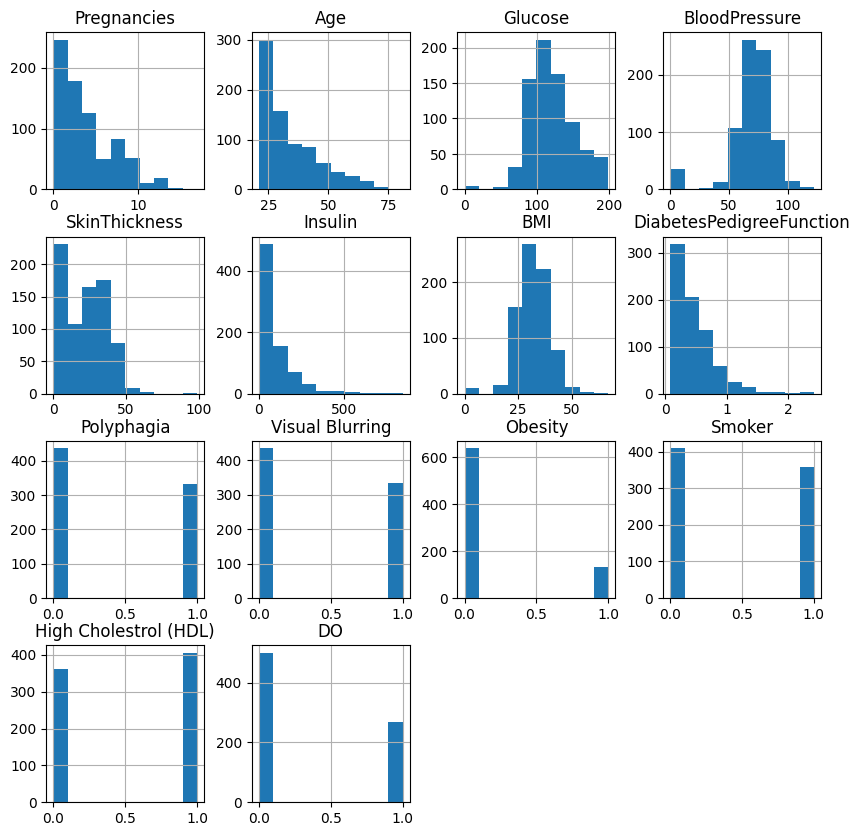

In [9]:
diabetes_df.hist(figsize=(10, 10))
plt.show()

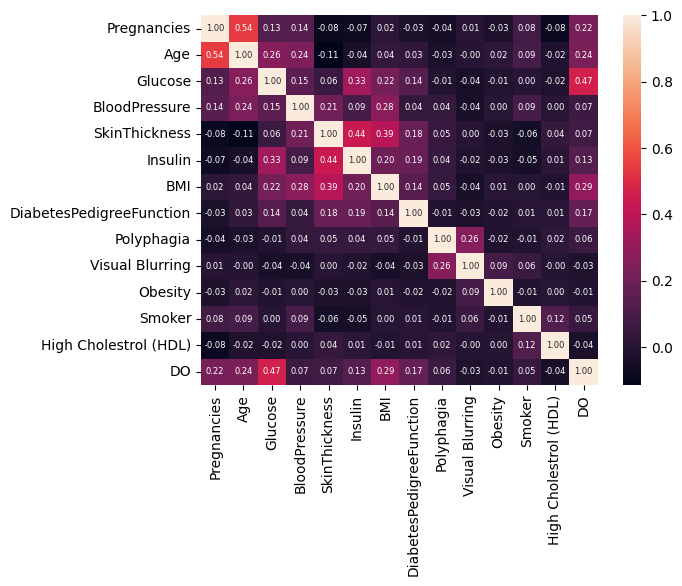

In [10]:
sns.heatmap(diabetes_df.corr(), annot=True, fmt=".2f", annot_kws={"fontsize": 6})
plt.show()

In [11]:
diabetes_df = diabetes_df.dropna()

** Checking that which columns have higher outliers**

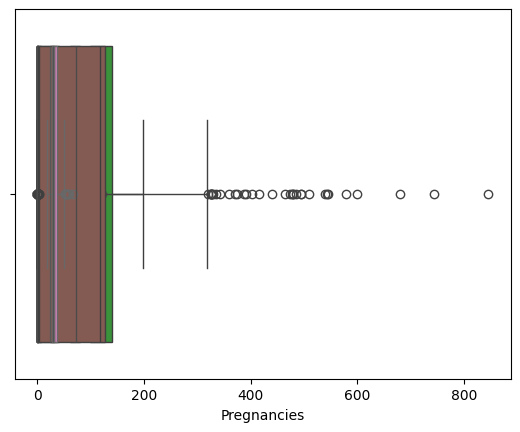

In [12]:
import seaborn as sns

# Create a boxplot for each column
for col in diabetes_df.columns:
    sns.boxplot(x=diabetes_df[col])

**Printing the columns having higher outliers**

In [13]:
# Calculate the interquartile range for each column
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Count the number of outliers for each column
num_outliers = ((diabetes_df < (Q1 - 1.5 * IQR)) | (diabetes_df > (Q3 + 1.5 * IQR))).sum()

In [14]:
# Sort columns by number of outliers
sorted_cols = num_outliers.sort_values(ascending=False)

# Print columns with most outliers
print(sorted_cols.head())

Obesity                     130
BloodPressure                45
Insulin                      34
DiabetesPedigreeFunction     29
BMI                          19
dtype: int64


**Removing the outliers**

In [15]:
import numpy as np

# Calculate IQR for each column
Q1 = diabetes_df.quantile(0.25)
Q3 = diabetes_df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Determine which values are outliers
outliers = ((diabetes_df < (Q1 - threshold * IQR)) | (diabetes_df > (Q3 + threshold * IQR)))

# Remove rows containing outliers
clean_df = diabetes_df[~outliers.any(axis=1)]

**Splitting the train and test data from the dataset**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('DO', axis=1)
y = diabetes_df['DO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



**Feature importance**

In [17]:
import xgboost as xgb

In [18]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

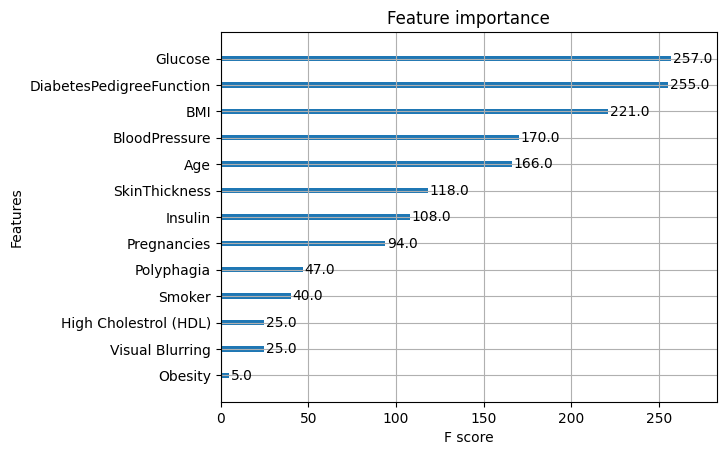

In [19]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()

In [20]:
# feature importance scores
feature_importance = model.get_booster().get_score(importance_type='total_gain')
cover_importance = model.get_booster().get_score(importance_type='total_cover')
frequency_importance = model.get_booster().get_score(importance_type='weight')

In [21]:
# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Gain': list(feature_importance.values()),
    'Cover': list(cover_importance.values()),
    'Frequency': list(frequency_importance.values())
})

# Sort the DataFrame by Gain score in descending order
scores_df = scores_df.sort_values(by='Gain', ascending=False)

# Display the DataFrame
print(scores_df)

                     Feature        Gain        Cover  Frequency
2                    Glucose  451.773987  4656.314453      257.0
6                        BMI  222.168533  3380.314453      221.0
1                        Age  185.236938  2476.060547      166.0
7   DiabetesPedigreeFunction  182.406570  3119.667725      255.0
3              BloodPressure  102.215950  2194.788818      170.0
5                    Insulin   84.253517  1271.223511      108.0
4              SkinThickness   81.559296  1000.767578      118.0
0                Pregnancies   61.382133   804.671021       94.0
8                 Polyphagia   26.457645   326.097809       47.0
11                    Smoker   19.475285   257.532898       40.0
9            Visual Blurring   10.994166   208.903458       25.0
12     High Cholestrol (HDL)    6.550662   100.393204       25.0
10                   Obesity    1.720213    90.129318        5.0


**Feature Scaling**

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Applying ANN**

In [23]:
import tensorflow as tf


In [24]:
ann = tf.keras.models.Sequential()

**Adding the input layers and hidden layers**

In [92]:
ann.add(tf.keras.layers.Dense(units=13,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))

**Output Layer**

In [93]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [94]:
ann.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

**Training the ANN on training Set**

In [97]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=260,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])


Accuracy: 0.757328987121582


![dnnwithdropout.jpeg](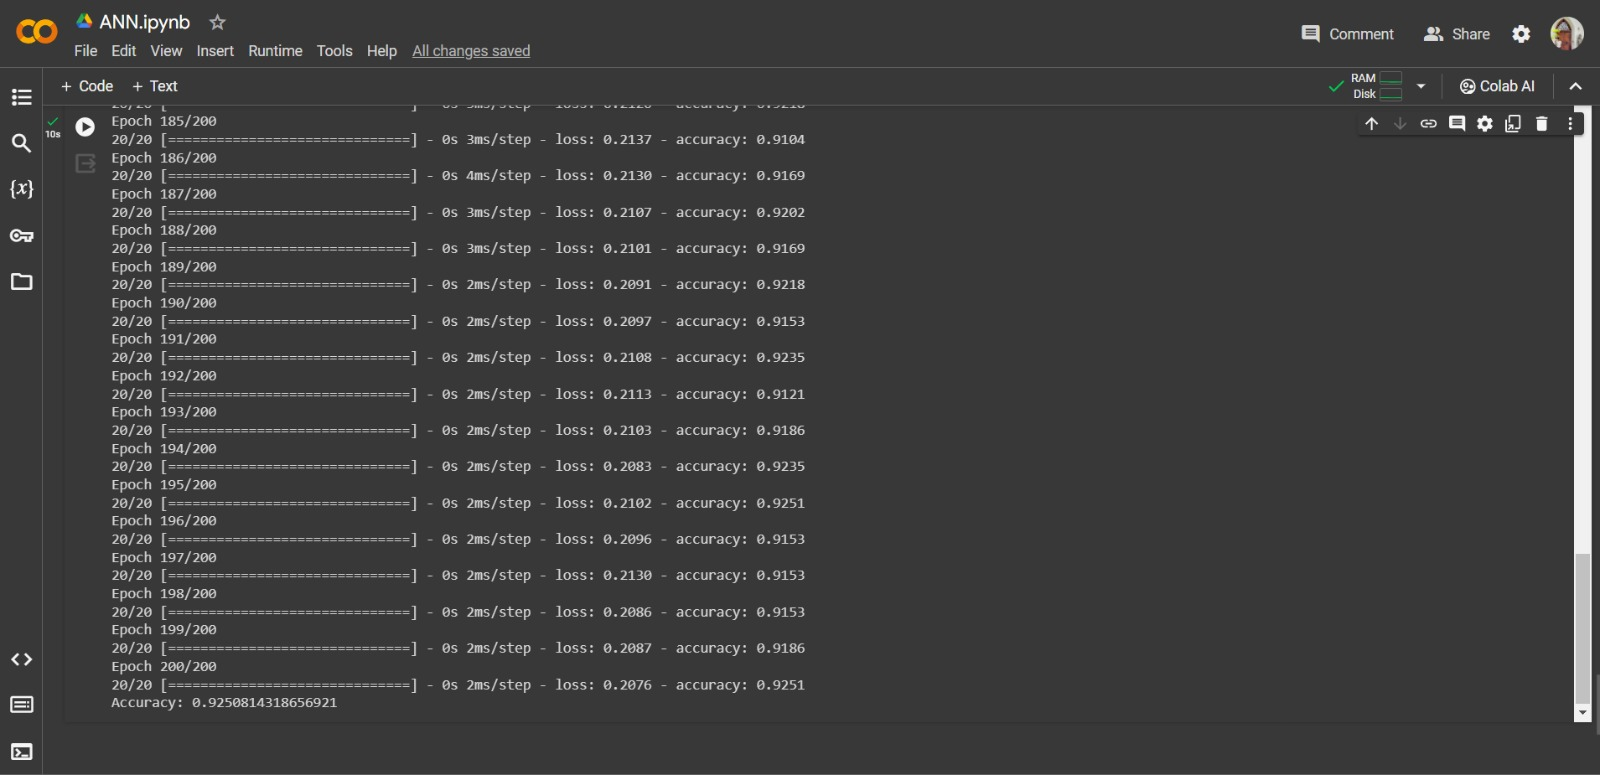![earlystopping.jpeg](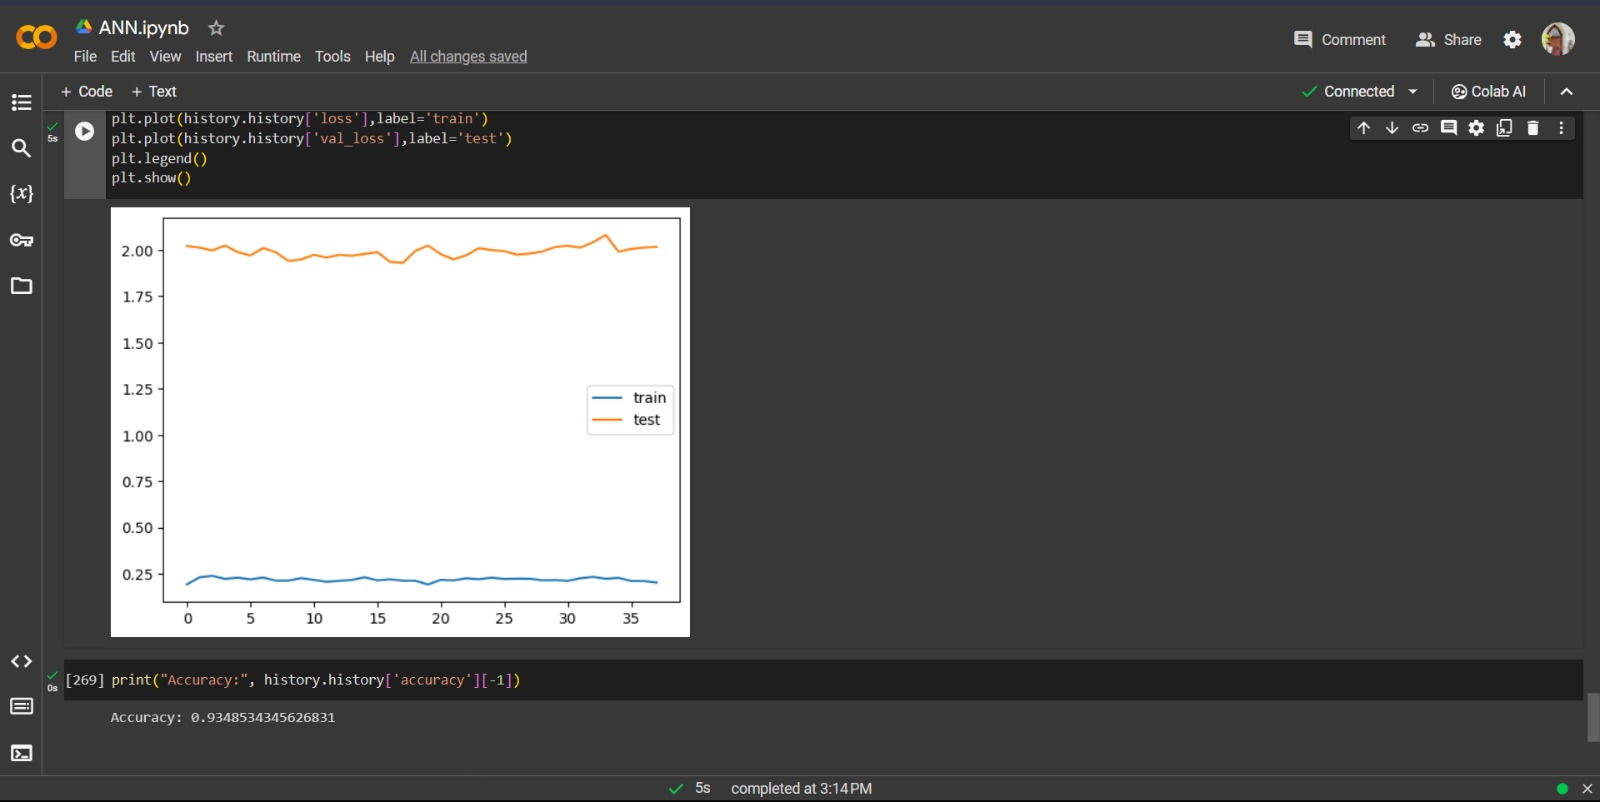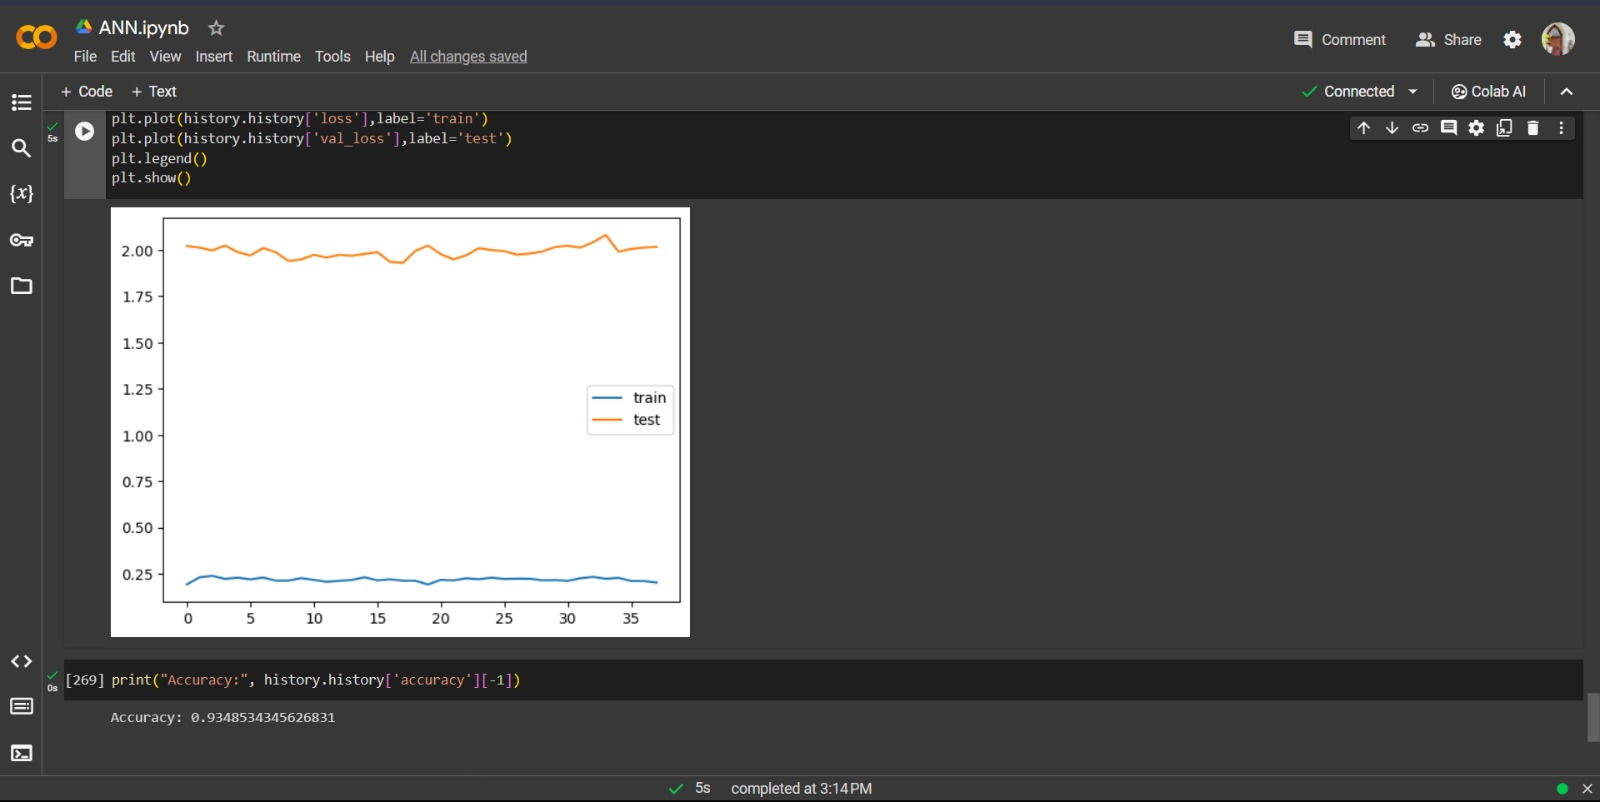))

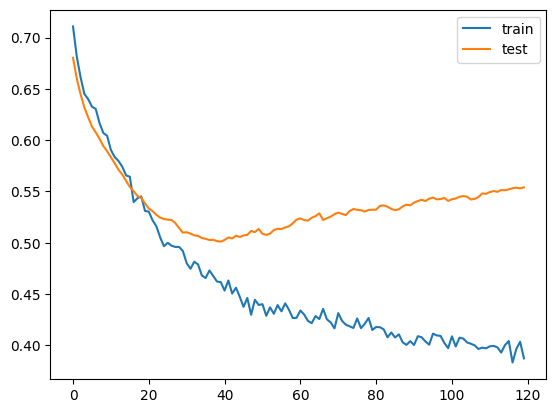

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

**Hyperparameter Tuning**

Early Stopping

In [84]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.000005,patience=20,verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [85]:
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=200, callbacks=callback)


Epoch 1/200
20/20 [==============================] - 0s 16ms/step - loss: 0.1041 - accuracy: 0.9886 - val_loss: 2.9719 - val_accuracy: 0.6688
Epoch 2/200
20/20 [==============================] - 0s 10ms/step - loss: 0.1040 - accuracy: 0.9886 - val_loss: 2.9440 - val_accuracy: 0.6753
Epoch 3/200
20/20 [==============================] - 0s 18ms/step - loss: 0.1034 - accuracy: 0.9886 - val_loss: 2.9026 - val_accuracy: 0.6688
Epoch 4/200
20/20 [==============================] - 0s 18ms/step - loss: 0.1034 - accuracy: 0.9886 - val_loss: 2.9622 - val_accuracy: 0.6753
Epoch 5/200
20/20 [==============================] - 0s 18ms/step - loss: 0.1030 - accuracy: 0.9886 - val_loss: 2.9205 - val_accuracy: 0.6753
Epoch 6/200
20/20 [==============================] - 0s 11ms/step - loss: 0.1030 - accuracy: 0.9886 - val_loss: 2.9529 - val_accuracy: 0.6818
Epoch 7/200
20/20 [==============================] - 0s 13ms/step - loss: 0.1027 - accuracy: 0.9886 - val_loss: 2.9491 - val_accuracy: 0.6688
Epoch 

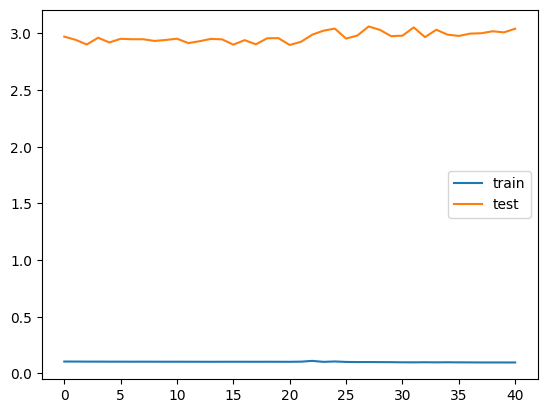

In [86]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [87]:
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.990227997303009


![earlystopping.png](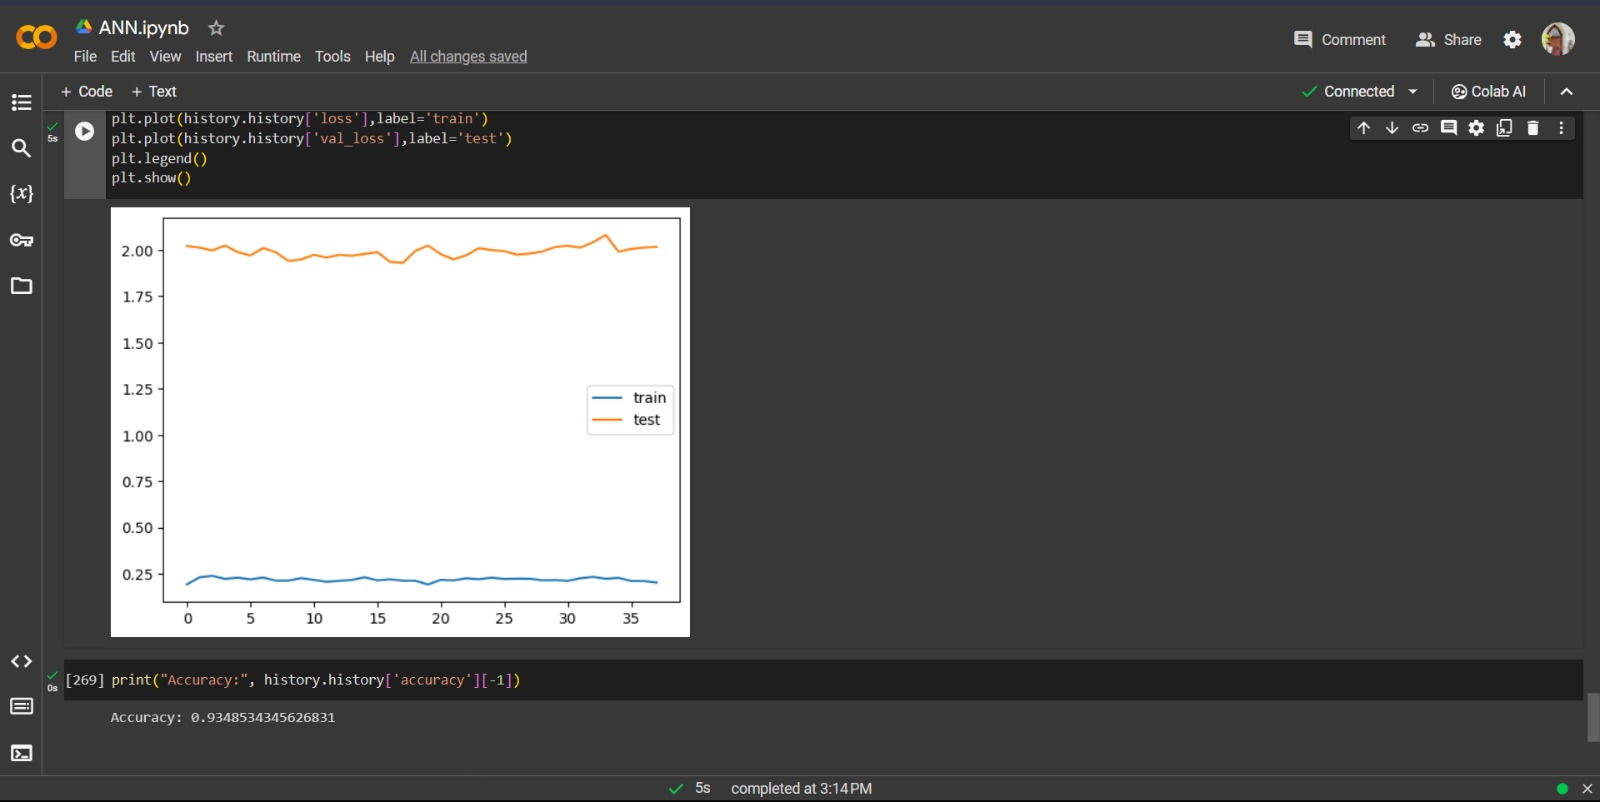![l1regularization.png](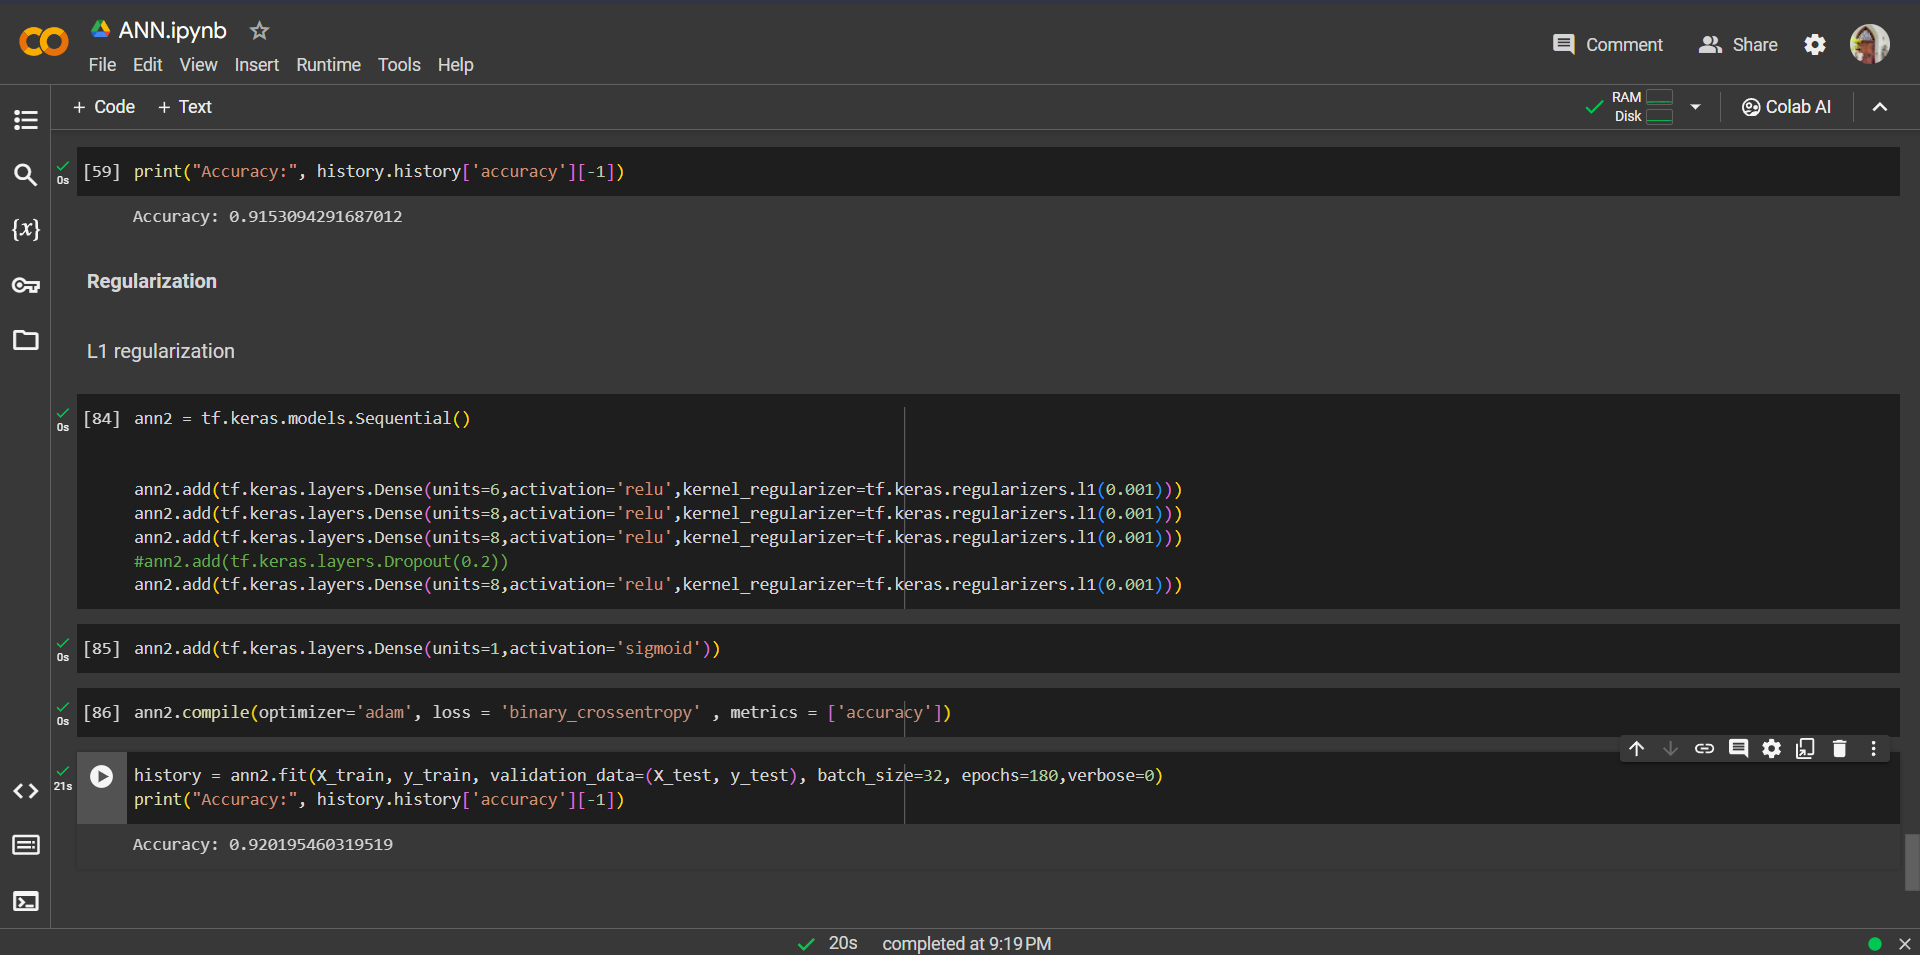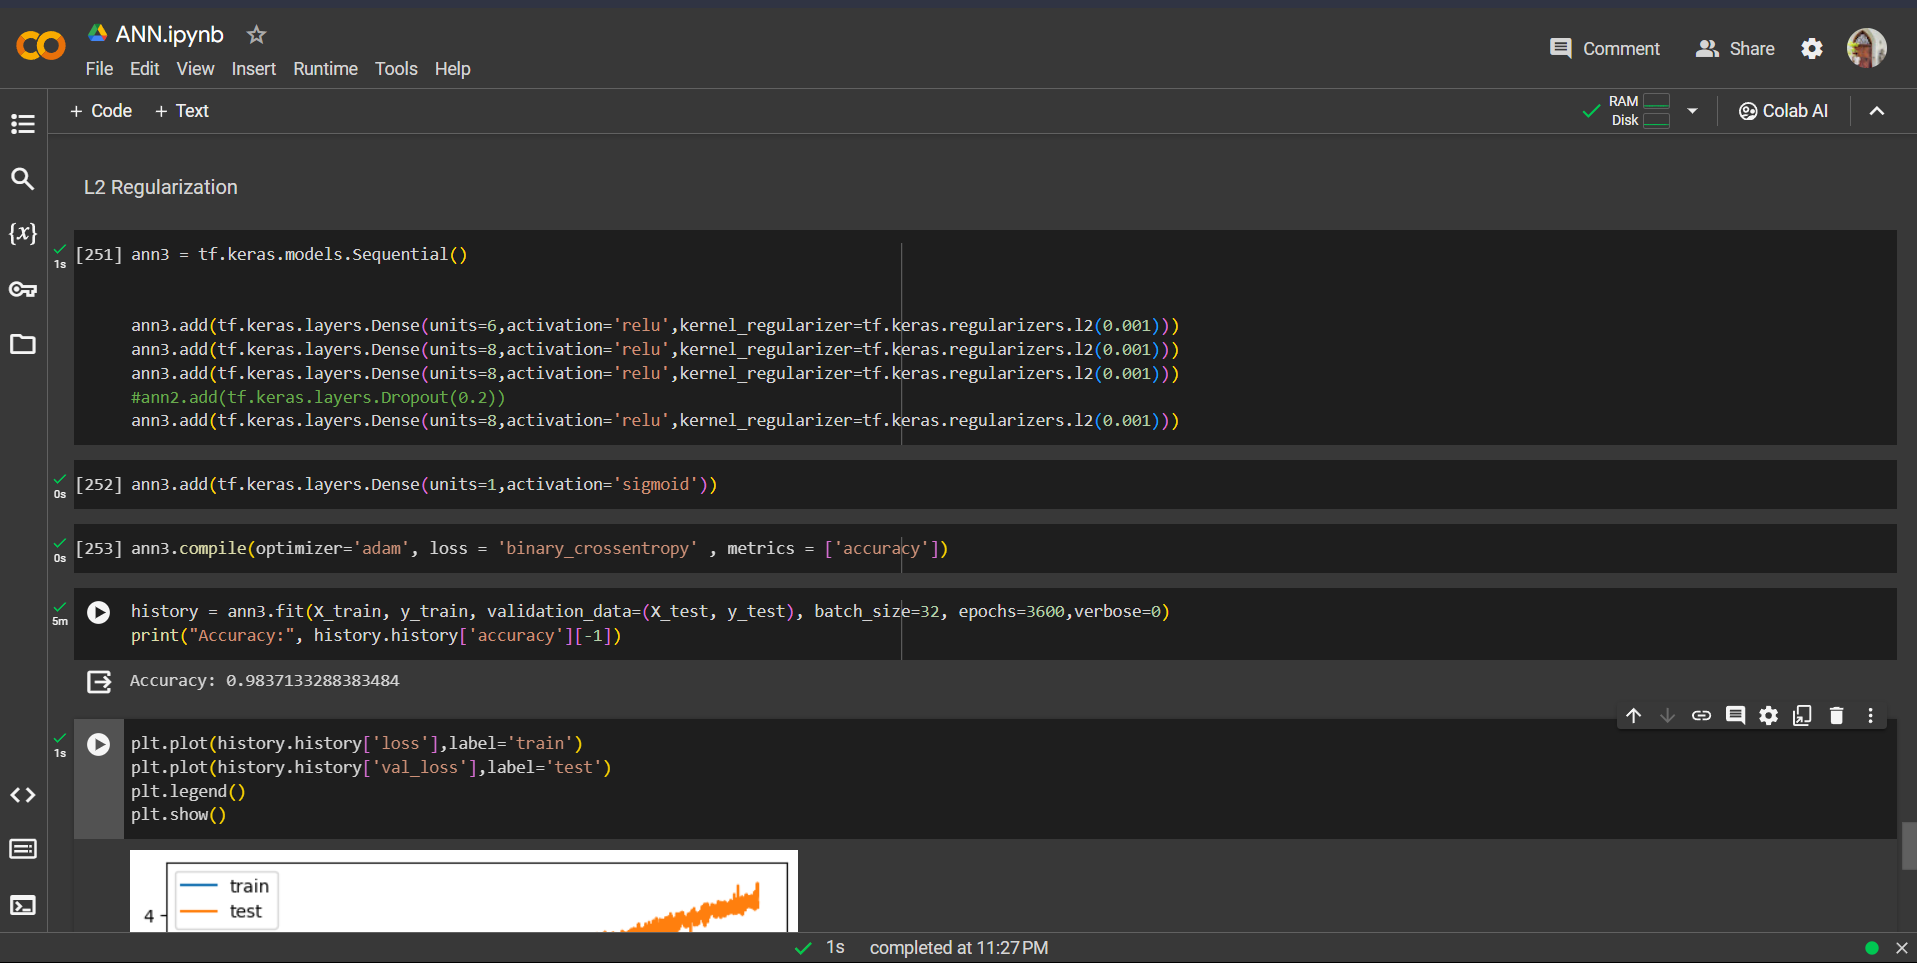))

**Regularization**

L1 regularization

In [54]:
ann2 = tf.keras.models.Sequential()


ann2.add(tf.keras.layers.Dense(units=13,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))
#ann2.add(tf.keras.layers.Dropout(0.2))
ann2.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l1(0.001)))

In [55]:
ann2.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [56]:
ann2.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [57]:
history = ann2.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=250,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9674267172813416


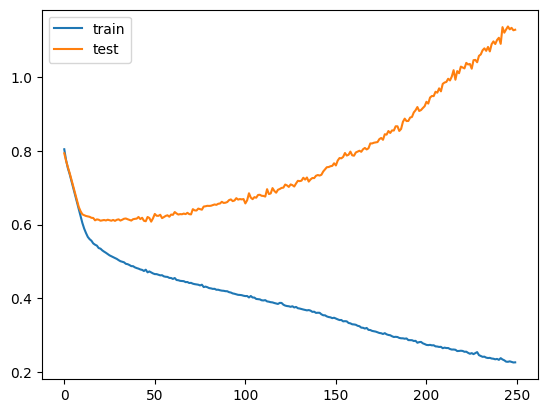

In [59]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

L2 Regularization

In [43]:
ann3 = tf.keras.models.Sequential()
ann3.add(tf.keras.layers.Dense(units=13,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
#ann2.add(tf.keras.layers.Dropout(0.2))
ann3.add(tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [44]:
ann3.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [45]:
ann3.compile(optimizer='adam', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [48]:
history = ann3.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=250,verbose=0)
print("Accuracy:", history.history['accuracy'][-1])

Accuracy: 0.9934853315353394


In [83]:
# Get the layer names
layer_names = [layer.name for layer in ann3.layers]

# Loop through each layer and print the specified parameters
for layer_name, layer in zip(layer_names, ann3.layers):
    weights = layer.get_weights()
    if len(weights) > 0:
        print(f'Layer: {layer_name}')
        print(f'Mean: {np.mean(weights[0])}')
        print(f'Momentum: {np.mean(weights[1])}')
        print(f'Mean Weight: {np.mean(weights[0])}')
        print(f'Weight RMS: {np.sqrt(np.mean(np.square(weights[0])))}')
        print(f'Mean Bias: {np.mean(weights[1])}')
        print(f'Bias RMS: {np.sqrt(np.mean(np.square(weights[1])))}')
        print('\n')

Layer: dense_19
Mean: -0.009283896535634995
Momentum: 0.14800015091896057
Mean Weight: -0.009283896535634995
Weight RMS: 0.30812451243400574
Mean Bias: 0.14800015091896057
Bias RMS: 0.20612163841724396


Layer: dense_20
Mean: -0.00137664086651057
Momentum: -0.02656864933669567
Mean Weight: -0.00137664086651057
Weight RMS: 0.3393898904323578
Mean Bias: -0.02656864933669567
Bias RMS: 0.1681586354970932


Layer: dense_21
Mean: 0.01921752654016018
Momentum: 0.01098355557769537
Mean Weight: 0.01921752654016018
Weight RMS: 0.4512914717197418
Mean Bias: 0.01098355557769537
Bias RMS: 0.18305353820323944


Layer: dense_22
Mean: 0.07689225673675537
Momentum: 0.14006565511226654
Mean Weight: 0.07689225673675537
Weight RMS: 0.44759005308151245
Mean Bias: 0.14006565511226654
Bias RMS: 0.1427609771490097


Layer: dense_23
Mean: 2.025217294692993
Momentum: -0.017830900847911835
Mean Weight: 2.025217294692993
Weight RMS: 3.887885093688965
Mean Bias: -0.017830900847911835
Bias RMS: 0.017830900847911835

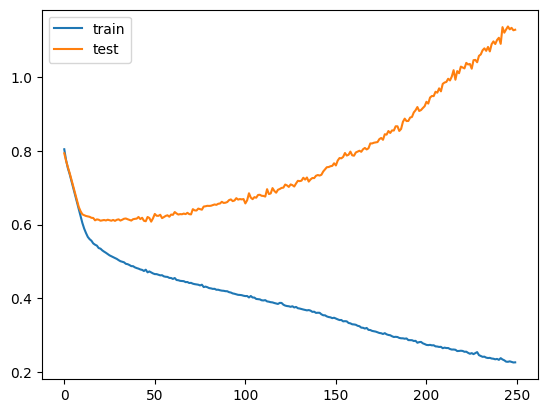

In [58]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [77]:
ann_weight_layer1 = ann.get_weights()[0].reshape(13, 1)
ann3_weight_layer1 = ann3.get_weights()[0].reshape(169, 1)

<Axes: >

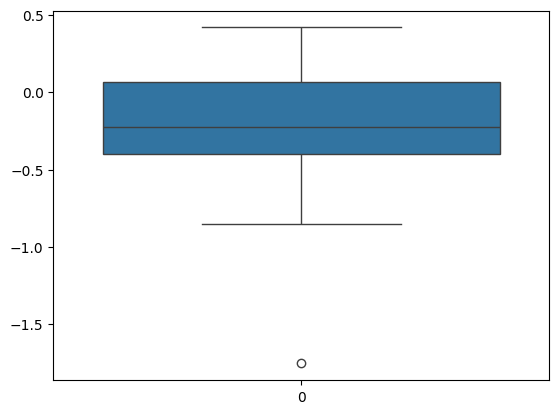

In [78]:
sns.boxplot(ann_weight_layer1)

<Axes: >

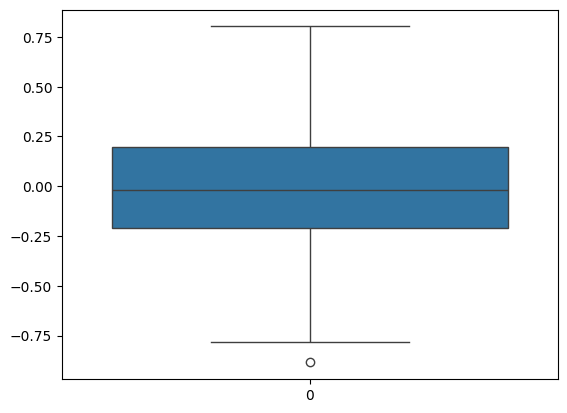

In [79]:
sns.boxplot(ann3_weight_layer1)

In [80]:
ann_weight_layer1.min()

-1.7531297

In [81]:
ann3_weight_layer1.min()

-0.8852448

<ipython-input-82-66c7f5d6a201>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ann_weight_layer1)
<ipython-input-82-66c7f5d6a201>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ann3_weight_layer1)


<Axes: ylabel='Density'>

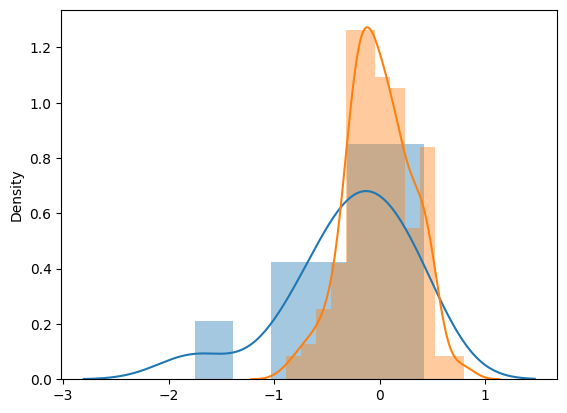

In [82]:
sns.distplot(ann_weight_layer1)
sns.distplot(ann3_weight_layer1)

**Performance Matrix**

In [102]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [103]:
y_pred = ann3.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

5/5 [==============================] - 0s 3ms/step


In [104]:
y_test_classes = y_test.values.astype(int)

Confusion Matrix

In [105]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[73 26]
 [24 31]]


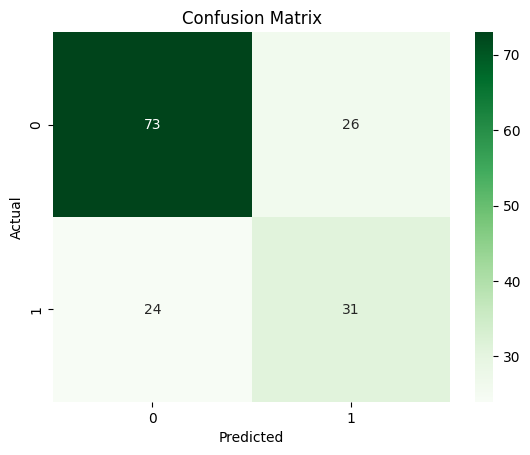

In [106]:
import matplotlib.pyplot as plt
sns.heatmap(cm,cmap="Greens",annot = True, xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**recall_score,precision_score,f1_score**

In [107]:
from sklearn.metrics import recall_score,precision_score,f1_score
recall = recall_score(y_test_classes,y_pred_classes)
precision = precision_score(y_test_classes,y_pred_classes)
F1_Score = f1_score(y_test_classes,y_pred_classes)

print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"F1_Score: {F1_Score}")

recall: 0.5636363636363636
precision: 0.543859649122807
F1_Score: 0.5535714285714286


In [108]:
specificity = cm[0,0]/(cm[0,0]+ cm[0,1])
print(f"specificity: {specificity}")

specificity: 0.7373737373737373


5/5 [==============================] - 0s 4ms/step


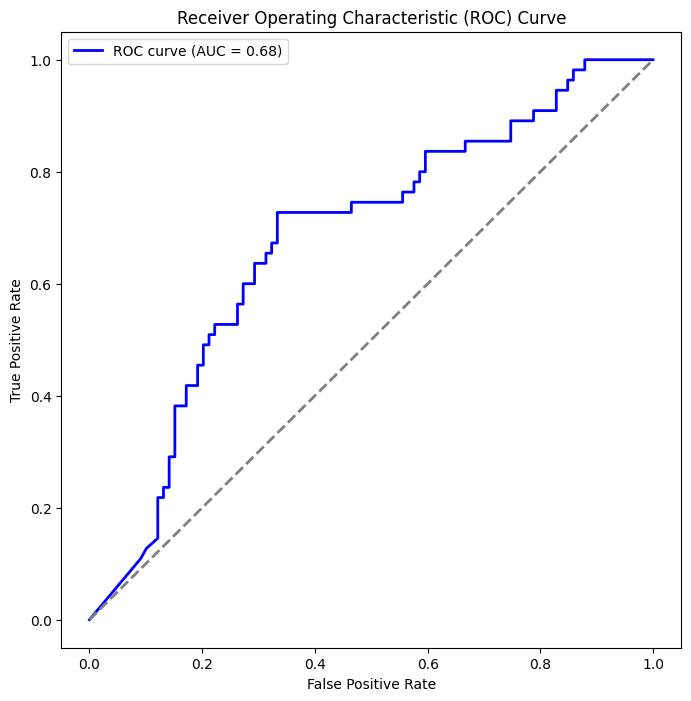

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import numpy as np

y_pred_prob = ann3.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
